# Clustering k-means

In [1]:
# Imports nécessaires pour le TP

import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import DBSCAN
import time
from sklearn import metrics
import numpy as np
import sys
import statistics

from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from sklearn.cluster import DBSCAN
import hdbscan


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

In [2]:
f = open('data/diamond9.arff', 'r')
#f = open('data/banana.arff', 'r')
data, meta = arff.loadarff(f)

print(data[0])
print(data['x'])
print(data['class'])
#print(meta)

(-1.98666, -0.00228882, b'0')
[-1.98666 -1.95108 -1.92679 ...  3.84756  3.89923  3.93759]
[b'0' b'0' b'0' ... b'8' b'8' b'8']


In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple']

c_used = [colors[int(data[i]['class'])] for i in range(len(data))]

plt.scatter(data['x'], data['y'], c=c_used, s=10)

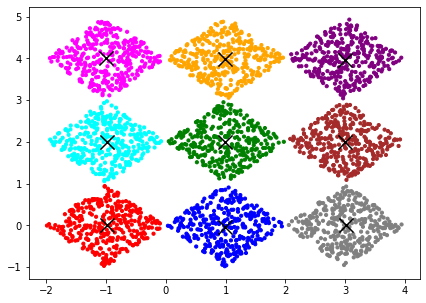

In [4]:
from sklearn.cluster import KMeans

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

kmeans = KMeans(n_clusters=9, random_state=0).fit(X)

#kmeans.labels_
#print(max(kmeans.labels_)) # 8 OK

#print(kmeans.cluster_centers_)

plt.figure(figsize=(7,5))

plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c='black', s=200, marker='x')

In [ ]:
data[0]
data[1]


In [ ]:
kmeans.predict([[1, 0.0]])

In [ ]:
from sklearn import metrics

labels_true = [int(data[i]['class']) for i in range(len(data))]

metrics.adjusted_rand_score(labels_true, kmeans.labels_)

In [ ]:
import time

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for k in range(2, 20):
    start_time = time.process_time()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    times.append(time.process_time() - start_time)
    
    values_silhouette.append(
        metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    )

    values_calinski.append(
        metrics.calinski_harabasz_score(X, kmeans.labels_)
    )
    values_bouldin.append(
        metrics.davies_bouldin_score(X, kmeans.labels_)
    )

In [ ]:
plt.figure(figsize=(17, 3))

plt.subplot(1, 3, 1)

plt.title('Score avec silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_silhouette)

plt.subplot(1, 3, 2)

plt.title('Score avec Calinski')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_calinski)

plt.subplot(1, 3, 3)

plt.title('Score avec Bouldin')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_bouldin)


In [ ]:
plt.title('Temps de recherche')
plt.xlabel('Nombre de clusters')
plt.ylabel('Temps de recherche')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), times)
plt.show()

times_kmeans = times

## Expérimentations avec d'autres formes

### Convexe / non séparés

In [ ]:
from scipy.io import arff

f = open('data/elly.arff', 'r')
data, meta = arff.loadarff(f)

print(data[0])
print(data['x'])
print(data['class'])
#print(meta)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple', 'darkblue']

c_used = [colors[int(data[i]['class'])] for i in range(len(data))]

plt.scatter(data['x'], data['y'], c=c_used, s=10)

In [ ]:
from sklearn.cluster import KMeans

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

#kmeans.labels_
#print(max(kmeans.labels_)) # 8 OK

#print(kmeans.cluster_centers_)

plt.figure(figsize=(20,15))

plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c='black', s=500, marker='x')

In [ ]:
kmeans.predict([[1, 0.0]])

In [ ]:
from sklearn import metrics

labels_true = [int(data[i]['class']) for i in range(len(data))]

metrics.adjusted_rand_score(labels_true, kmeans.labels_)

In [ ]:
import time

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for k in range(2, 20):
    start_time = time.process_time()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    times.append(time.process_time() - start_time)
    
    values_silhouette.append(
        metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    )

    values_calinski.append(
        metrics.calinski_harabasz_score(X, kmeans.labels_)
    )
    values_bouldin.append(
        metrics.davies_bouldin_score(X, kmeans.labels_)
    )
    



In [ ]:
plt.figure(figsize=(17, 3))

plt.subplot(1, 3, 1)


plt.title('Score avec silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_silhouette)

plt.subplot(1, 3, 2)

plt.title('Score avec Calinski')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_calinski)


plt.subplot(1, 3, 3)

plt.title('Score avec Bouldin')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_bouldin)

### Convexe / bien séparés / densités non similaires / bruité

In [ ]:
from scipy.io import arff

f = open('data/CURE.arff', 'r')
data, meta = arff.loadarff(f)

print(data[0])
print(data['x'])
print(data['class'])
#print(meta)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta']

c_used = [colors[6 if data[i]['class'].decode("utf-8") == 'noise' else int(data[i]['class'])] for i in range(len(data))]

plt.scatter(data['x'], data['y'], c=c_used, s=10)

In [ ]:
from sklearn.cluster import KMeans

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

#kmeans.labels_
#print(max(kmeans.labels_)) # 8 OK

#print(kmeans.cluster_centers_)

plt.figure(figsize=(20,15))

plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c='black', s=500, marker='x')

In [ ]:
kmeans.predict([[1, 0.0]])

In [ ]:
from sklearn import metrics

labels_true = [6 if data[i]['class'].decode("utf-8") == 'noise' else int(data[i]['class']) for i in range(len(data))]

metrics.adjusted_rand_score(labels_true, kmeans.labels_)

In [ ]:
import time

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for k in range(2, 20):
    start_time = time.process_time()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    times.append(time.process_time() - start_time)
    
    values_silhouette.append(
        metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    )

    values_calinski.append(
        metrics.calinski_harabasz_score(X, kmeans.labels_)
    )
    values_bouldin.append(
        metrics.davies_bouldin_score(X, kmeans.labels_)
    )
    
    

In [ ]:
plt.figure(figsize=(17, 3))

plt.subplot(1, 3, 1)


plt.title('Score avec silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_silhouette)

plt.subplot(1, 3, 2)

plt.title('Score avec Calinski')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_calinski)


plt.subplot(1, 3, 3)

plt.title('Score avec Bouldin')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_bouldin)

Penser à tester avec des formes non convexes pour voir si ça influe le résultat. 

# Clustering agglométarif

In [ ]:
from scipy.io import arff

# CURE, diamond9, spiral
f = open('data/CURE.arff', 'r')
data, meta = arff.loadarff(f)

print(data[0])
print(data['x'])
print(data['class'])
#print(meta)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import numpy as np

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple']
c_used = [colors[6 if data[i]['class'].decode("utf-8") == 'noise' else int(data[i]['class'])] for i in range(len(data))]

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

agglo = AgglomerativeClustering(n_clusters=9, linkage='ward').fit(X)

plt.figure(figsize=(20,15))


children = agglo.children_

# Distances between each pair of children
# Since we don't have this information, we can use a uniform one for plotting
distance = np.arange(children.shape[0])

# The number of observations contained in each cluster level
no_of_observations = np.arange(2, children.shape[0]+2)

# Create linkage matrix and then plot the dendrogram
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

In [ ]:
# Plot the corresponding dendrogram
plt.figure(figsize=(20,20))
#dendrogram(linkage_matrix)

In [ ]:
# Zone de tests pour les graphiques du rapport

from scipy.io import arff

f = open('data/banana.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,5))

agglo = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
c_used = [colors[agglo.labels_[i]] for i in range(len(data))]
plt.subplot(1,2,1)
plt.scatter(data['x'], data['y'], c=c_used, s=10)

# CURE, diamond9, spiral
f = open('data/CURE.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,5))

agglo = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
c_used = [colors[agglo.labels_[i]] for i in range(len(data))]
plt.subplot(1,2,1)
plt.scatter(data['x'], data['y'], c=c_used, s=10)

f = open('data/spiral.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

agglo = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
c_used = [colors[agglo.labels_[i]] for i in range(len(data))]
plt.subplot(1,2,2)
plt.scatter(data['x'], data['y'], c=c_used, s=10)

In [ ]:
colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(20,20))

for k in range(2, 13):
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(X)
    c_used = [colors[agglo.labels_[i]] for i in range(len(data))]

    
    plt.subplot(5, 3, k-1)
    plt.scatter(data['x'], data['y'], c=c_used, s=10)

diamond9 > nickel (0.99)

CURE > Ca marche plutôt bien sauf pour le gros qui est toujours divisé (même problème que k-means)
Le bruit est rattaché à un cluster

Spiral > dégueu (0.01)

In [ ]:
from sklearn import metrics

#labels_true = [6 if data[i]['class'].decode("utf-8") == 'noise' else int(data[i]['class']) for i in range(len(data))]
labels_true = [int(data[i]['class']) for i in range(len(data))]

metrics.adjusted_rand_score(labels_true, agglo.labels_)

## Test de différentes méthodes de linkage

In [ ]:
from scipy.io import arff

f = open('data/aggregation.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

linkages = ['ward', 'complete', 'average', 'single']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,3))

i = 1
for linkage in linkages:
    agglo = AgglomerativeClustering(n_clusters=7, linkage=linkage).fit(X)
    c_used = [colors[agglo.labels_[i]] for i in range(len(data))]

    
    plt.subplot(1, 4, i)
    plt.scatter(data['x'], data['y'], c=c_used, s=10)
    plt.title(linkage)
    i += 1
    
    

    
    
    
f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

linkages = ['ward', 'complete', 'average', 'single']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,3))

i = 1
for linkage in linkages:
    agglo = AgglomerativeClustering(n_clusters=9, linkage=linkage).fit(X)
    c_used = [colors[agglo.labels_[i]] for i in range(len(data))]

    
    plt.subplot(1, 4, i)
    plt.scatter(data['x'], data['y'], c=c_used, s=10)
    plt.title(linkage)
    i += 1

    

    
    
    
f = open('data/CURE.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

linkages = ['ward', 'complete', 'average', 'single']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,3))

i = 1
for linkage in linkages:
    agglo = AgglomerativeClustering(n_clusters=6, linkage=linkage).fit(X)
    c_used = [colors[agglo.labels_[i]] for i in range(len(data))]

    
    plt.subplot(1, 4, i)
    plt.scatter(data['x'], data['y'], c=c_used, s=10)
    plt.title(linkage)
    i += 1

In [ ]:
# Zones de test pour les graphiques

from scipy.io import arff

f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(10,3))


agglo = AgglomerativeClustering(n_clusters=9, linkage='single').fit(X)
c_used = [colors[agglo.labels_[i]] for i in range(len(data))]

    
plt.subplot(1, 2, 1)
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title(linkage)

    

    
f = open('data/CURE.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']


X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

agglo = AgglomerativeClustering(n_clusters=6, linkage='single').fit(X)
c_used = [colors[agglo.labels_[i]] for i in range(len(data))]

plt.subplot(1, 2, 2)
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title(linkage)

In [ ]:
import time

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []


f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

linkages = ['ward', 'complete', 'average', 'single']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]


for linkage in linkages:

    values_silhouette.append([])
    values_calinski.append([])
    values_bouldin.append([])
    times.append([])
    
    for k in range(2,20):
        start_time = time.process_time()
        agglo = AgglomerativeClustering(n_clusters=k, linkage=linkage).fit(X)
        times[-1].append(time.process_time() - start_time)

        values_silhouette[-1].append(
            metrics.silhouette_score(X, agglo.labels_, metric='euclidean')
        )
        values_calinski[-1].append(
            metrics.calinski_harabasz_score(X, agglo.labels_)
        )
        values_bouldin[-1].append(
            metrics.davies_bouldin_score(X, agglo.labels_)
        )

In [ ]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
plt.title('Score avec silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_silhouette[0])
plt.plot(range(2,20), values_silhouette[1])
plt.plot(range(2,20), values_silhouette[2])
plt.plot(range(2,20), values_silhouette[3])
plt.legend(['ward', 'complete', 'average', 'single'])

plt.subplot(1,3,2)
plt.title('Score avec Calinski')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_calinski[0])
plt.plot(range(2,20), values_calinski[1])
plt.plot(range(2,20), values_calinski[2])
plt.plot(range(2,20), values_calinski[3])
plt.legend(['ward', 'complete', 'average', 'single'])

plt.subplot(1,3,3)
plt.title('Score avec Bouldin')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_bouldin[0])
plt.plot(range(2,20), values_bouldin[1])
plt.plot(range(2,20), values_bouldin[2])
plt.plot(range(2,20), values_bouldin[3])
plt.legend(['ward', 'complete', 'average', 'single'])

In [ ]:
plt.title('Temps de recherche')
plt.xlabel('Nombre de clusters')
plt.ylabel('Temps de recherche')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), times[0])
plt.plot(range(2,20), times[1])
plt.plot(range(2,20), times[2])
plt.plot(range(2,20), times[3])
plt.legend(['ward', 'complete', 'average', 'single'])
plt.show()

times_agglo = times[3]

In [ ]:
# Comparaison des temps entre k-Means et clustering agglomératif

plt.title('Temps de recherche')
plt.xlabel('Nombre de clusters')
plt.ylabel('Temps de recherche')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), times_kmeans)
plt.plot(range(2,20), times_agglo)
plt.legend(['k-Means', 'Clustering agglomératif'])
plt.show()

# Clustering DBSCAN

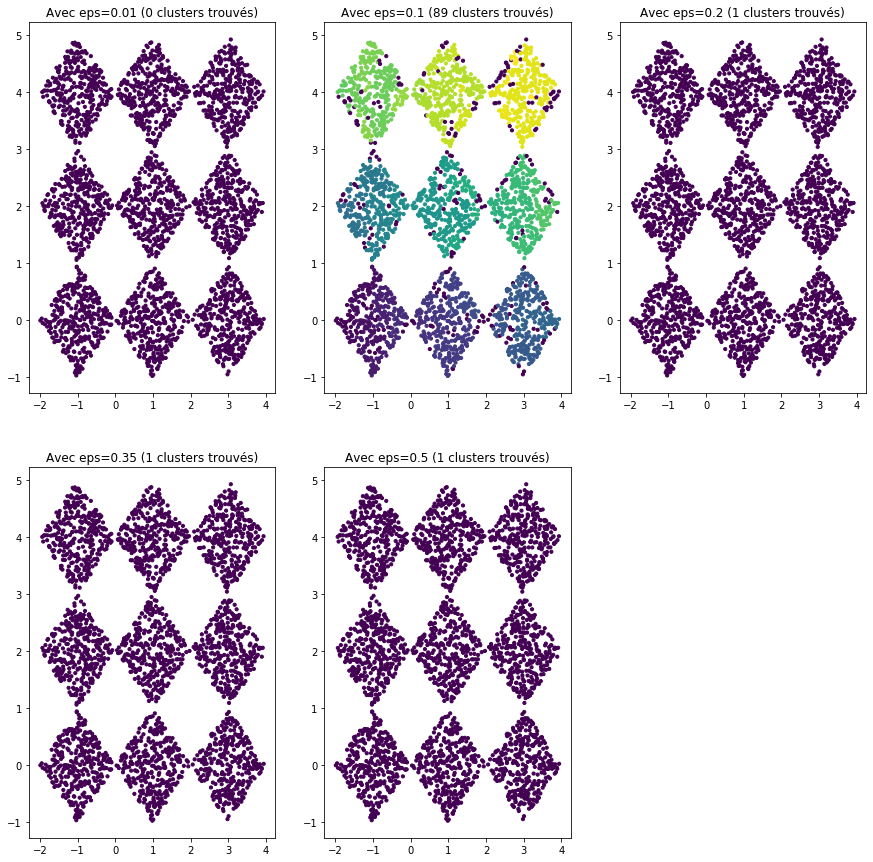

In [16]:
from scipy.io import arff
from sklearn.cluster import DBSCAN

f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,15))

j = 1
for eps in [0.01, 0.1, 0.2, 0.35, 0.5]:
    dbscan = DBSCAN(eps=eps).fit(X)
    
    plt.subplot(2, 3, j)
    plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
    plt.title("Avec eps=" + str(eps) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
    j += 1

eps : 0.05 / min_s = 6 / clusters trouvés : 8
[-1 -1 -1 ... -1 -1 -1]
eps : 0.06 / min_s = 7 / clusters trouvés : 8
[-1 -1 -1 ... -1 -1 -1]
eps : 0.07 / min_s = 8 / clusters trouvés : 8
[-1 -1 -1 ... -1 -1 -1]
eps : 0.13 / min_s = 4 / clusters trouvés : 8
[0 0 0 ... 7 7 7]
eps : 0.13 / min_s = 5 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.14 / min_s = 6 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.15 / min_s = 7 / clusters trouvés : 8
[0 0 0 ... 7 7 7]
eps : 0.15 / min_s = 8 / clusters trouvés : 8
[0 0 0 ... 7 7 7]
eps : 0.15 / min_s = 9 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.15 / min_s = 10 / clusters trouvés : 10
[-1 -1  0 ...  9  9  9]


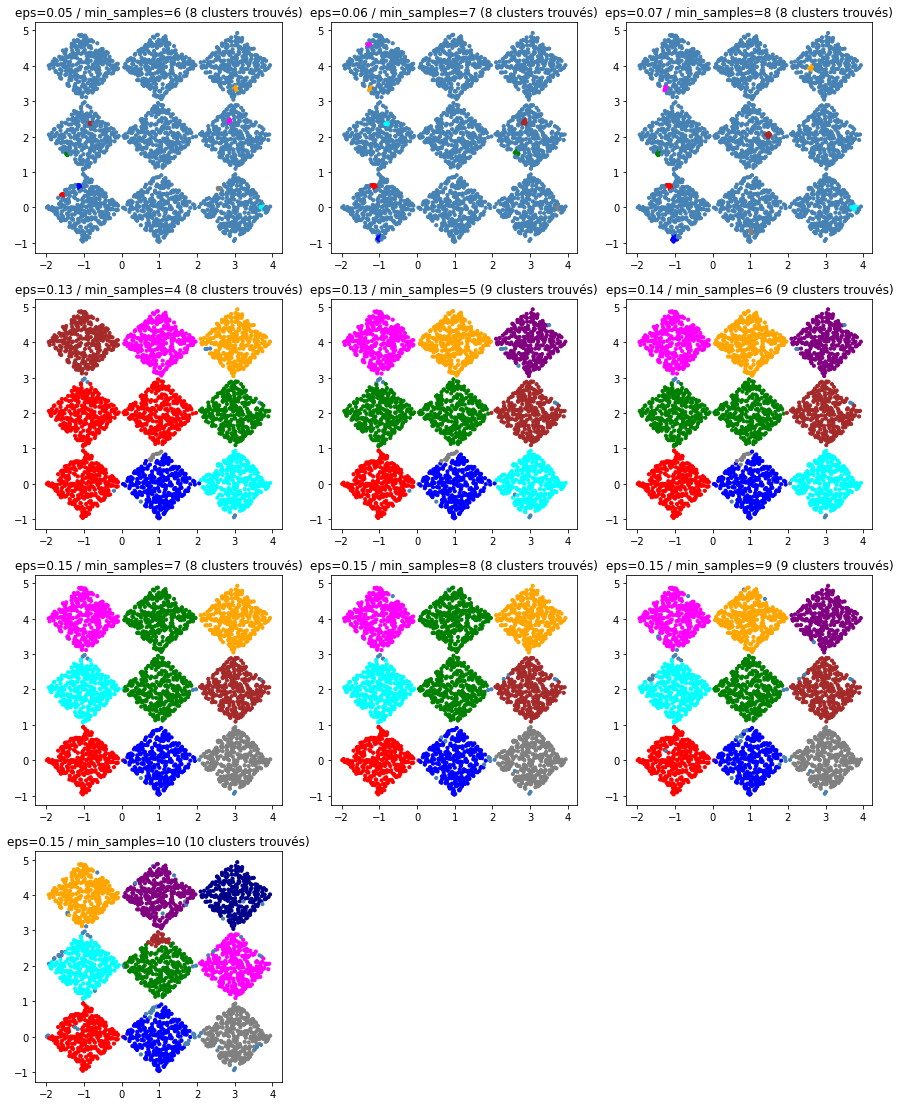

In [32]:
from scipy.io import arff
from sklearn.cluster import DBSCAN

f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for eps in range(5, 16):
    eps = eps / 100
    
    times.append([])
    
    for min_samples in range(2, 15):
        start_time = time.process_time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        times[-1].append(time.process_time() - start_time)
        
        if max(dbscan.labels_) >= 1:
            values_silhouette.append(
                (eps, min_samples, metrics.silhouette_score(X, dbscan.labels_, metric='euclidean'))
            )
            values_calinski.append(
                metrics.calinski_harabasz_score(X, dbscan.labels_)
            )
            values_bouldin.append(
                metrics.davies_bouldin_score(X, dbscan.labels_)
            )
        else:
            values_silhouette.append(0)
            values_calinski.append(0)
            values_bouldin.append(0)
        
        score = max(dbscan.labels_) + 1
        
        if (score >= 8 and score <= 10):
            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
            print(dbscan.labels_)
            plt.subplot(10, 3, j)
            #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
            c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
            plt.scatter(data['x'], data['y'], c=c_used, s=10)
            plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
            j += 1


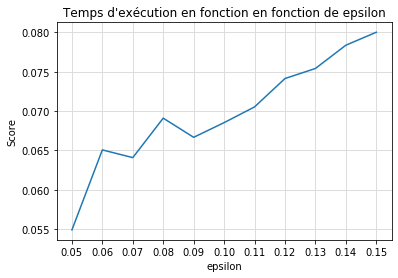

In [71]:
# Mesure des temps d'exécution

plt.title("Temps d'exécution en fonction en fonction de epsilon")
plt.xlabel('epsilon')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks([float(i)/100 for i in range(5,16)])
plt.plot([float(i)/100 for i in range(5,16)], times_ave)

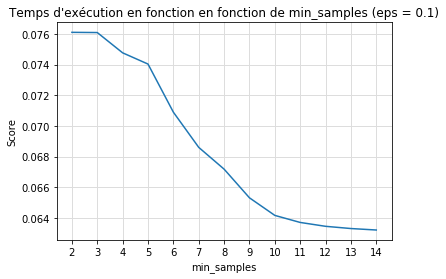

In [70]:
plt.title("Temps d'exécution en fonction en fonction de min_samples (eps = 0.1)")
plt.xlabel('min_samples')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,15))
plt.plot(range(2,15), times[5])

In [ ]:
# Visualisation 3D fonctionne pas ici
from mpl_toolkits import mplot3d

zline = np.linspace(0, max(values_silhouette), 1000)
xline = np.linspace(0.05, 0.16, 1000)
yline = np.linspace(1, 15, 1000)

zdata = values_silhouette
xdata = range(5, 16)
ydata = range(2, 15)

ax = plt.axes(projection='3d')
#ax.view_init(30, 45)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap="Greens")

In [ ]:
# Visualisation 3D fonctionne pas ici

from mpl_toolkits.mplot3d import Axes3D

Axes3D.plot(range(5, 16), range(2, 15), values_silhouette)

On retient eps=0.15 et min_samples=9

On retrouve bien nos 9 clusters, et peu de points restent non classés

In [ ]:
values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for k in range(2, 20):
    start_time = time.process_time()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    times.append(time.process_time() - start_time)
    
    values_silhouette.append(
        metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    )

    values_calinski.append(
        metrics.calinski_harabasz_score(X, kmeans.labels_)
    )
    values_bouldin.append(
        metrics.davies_bouldin_score(X, kmeans.labels_)
    )

In [ ]:
from scipy.io import arff
from sklearn.cluster import DBSCAN

f = open('data/spiral.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for eps in range(1, 110):
    eps = eps / 100
    
    for min_samples in range(2, 150):
        start_time = time.process_time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        times.append(time.process_time() - start_time)
        
        if max(dbscan.labels_) >= 1:
            values_silhouette.append(
                metrics.silhouette_score(X, dbscan.labels_, metric='euclidean')
            )
            values_calinski.append(
                metrics.calinski_harabasz_score(X, dbscan.labels_)
            )
            values_bouldin.append(
                metrics.davies_bouldin_score(X, dbscan.labels_)
            )
        else:
            values_silhouette.append(0)
            values_calinski.append(0)
            values_bouldin.append(0)
        
        score = max(dbscan.labels_) + 1
        
        printed = 0
        if (score == 3 and printed <= 5):
            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
            plt.subplot(10, 3, j)
            #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
            c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
            plt.scatter(data['x'], data['y'], c=c_used, s=10)
            plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
            j += 1
            printed += 1
            print(printed)


### Autre façon de chercher eps/min_samples

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import math
import statistics

def computeAverageDistances(data, n_neighbors):
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    x = [(data[i]['x'], data[i]['y']) for i in range(len(data))]
    nbrs = neigh.fit(x)
    distances, indices = nbrs.kneighbors(x)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    
    
def computeDistance(a, b):
    return math.sqrt((a['x'] - b['x'])**2 + (a['y'] - b['y'])**2)
    
    
def computeAverageDistances2(index, n_neighbors):
    distances_vec = []

    for j in range(len(data)):
            if index != j:
                distances_vec.append(computeDistance(data[index], data[j]))

    distances_vec.sort()

    if index % 100 == 0:
        print(index)
        
    return statistics.mean(distances_vec[:n_neighbors])
        
    
    
f = open('data/CURE.arff', 'r')
data, meta = arff.loadarff(f)

test = [computeAverageDistances2(i, 5) for i in range(len(data))]
print(test)
#computeAverageDistances(data, 3000)

In [ ]:
test.sort()
test
print(len(test))

plt.title('Distance moyenne des 5 plus proches voisins pour chaque point')
plt.xlabel('Indexes des points du dataset')
plt.ylabel('Distance moyenne des 5 plus proches voisins')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.plot(test)


In [ ]:
X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

# Fait varier eps de 0.04 à 0.06 (pas de 0.005)
for eps in range(40, 65, 5):
    eps = eps / 1000
    
    plt.figure(figsize=(15,50))
    
    values_silhouette = []
    values_calinski = []
    values_bouldin = []

    for min_samples in range(2, 15):
        start_time = time.process_time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        times.append(time.process_time() - start_time)
        
        if max(dbscan.labels_) >= 1:
            values_silhouette.append(
                metrics.silhouette_score(X, dbscan.labels_, metric='euclidean')
            )
            values_calinski.append(
                metrics.calinski_harabasz_score(X, dbscan.labels_)
            )
            values_bouldin.append(
                metrics.davies_bouldin_score(X, dbscan.labels_)
            )
        else:
            values_silhouette.append(0)
            values_calinski.append(0)
            values_bouldin.append(0)
    
    plt.subplot(10, 3, 1)
    plt.title('Score avec silhouette / eps = ' + str(eps))
    plt.xlabel('min_samples')
    plt.ylabel('Score')
    plt.grid(color='#dddddd', linestyle='-', linewidth=1)
    plt.xticks(range(2,15))
    plt.plot(range(2,15), values_silhouette)
    
    plt.subplot(10, 3, 2)
    plt.title('Score avec Calinski / eps = ' + str(eps))
    plt.xlabel('min_samples')
    plt.ylabel('Score')
    plt.grid(color='#dddddd', linestyle='-', linewidth=1)
    plt.xticks(range(2,15))
    plt.plot(range(2,15), values_calinski)
    
    plt.subplot(10, 3, 3)
    plt.title('Score avec Bouldin / eps = ' + str(eps))
    plt.xlabel('min_samples')
    plt.ylabel('Score')
    plt.grid(color='#dddddd', linestyle='-', linewidth=1)
    plt.xticks(range(2,15))
    plt.plot(range(2,15), values_bouldin)

    plt.show()

On que les combinaisons 0.04 <= eps <= 0.06, 5 <= min_samples <= 8 semblent donner les meilleurs scores.

In [ ]:
colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for eps in range(40, 65, 5):
    eps = eps / 1000
    
    for min_samples in range(5, 9):
        start_time = time.process_time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        times.append(time.process_time() - start_time)
        
        if max(dbscan.labels_) >= 1:
            values_silhouette.append(
                metrics.silhouette_score(X, dbscan.labels_, metric='euclidean')
            )
            values_calinski.append(
                metrics.calinski_harabasz_score(X, dbscan.labels_)
            )
            values_bouldin.append(
                metrics.davies_bouldin_score(X, dbscan.labels_)
            )
        else:
            values_silhouette.append(0)
            values_calinski.append(0)
            values_bouldin.append(0)
        
        score = max(dbscan.labels_) + 1
        
        if score < len(colors):
            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
            plt.subplot(10, 3, j)
            #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
            c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
            plt.scatter(data['x'], data['y'], c=c_used, s=10)
            plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
            j += 1


## Autres tests sur DBSCAN

Pour approfondir nos recherches sur DBSCAN, d'autres tests ont été réalisés (avec les mêmes objectifs que les précédents).

### Tests avec eps et min_samples au hasard

min_samples laissé par défaut

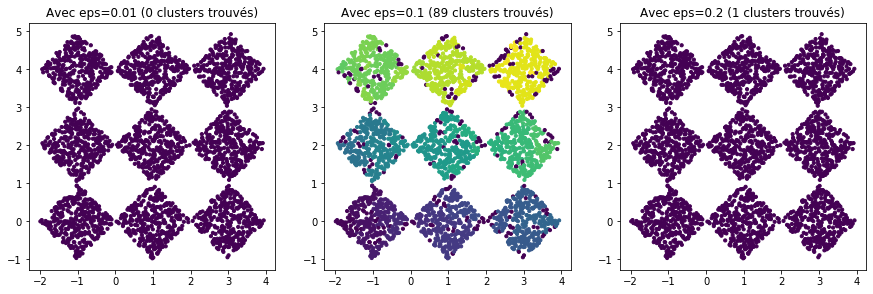

In [20]:
f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,10))

j = 1
for eps in [0.01, 0.1, 0.2]:
    dbscan = DBSCAN(eps=eps).fit(X)
    
    plt.subplot(2, 3, j)
    plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
    plt.title("Avec eps=" + str(eps) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
    j += 1

### Recherche des meilleurs hyper-parametres pour diamonds

eps : 0.13 / min_s = 5 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.14 / min_s = 6 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.15 / min_s = 9 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.16 / min_s = 9 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.16 / min_s = 10 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.17 / min_s = 11 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.17 / min_s = 12 / clusters trouvés : 9
[-1 -1 -1 ...  8  8  8]
eps : 0.17 / min_s = 13 / clusters trouvés : 9
[-1 -1 -1 ...  8 -1 -1]
eps : 0.18 / min_s = 12 / clusters trouvés : 9
[0 0 0 ... 8 8 8]


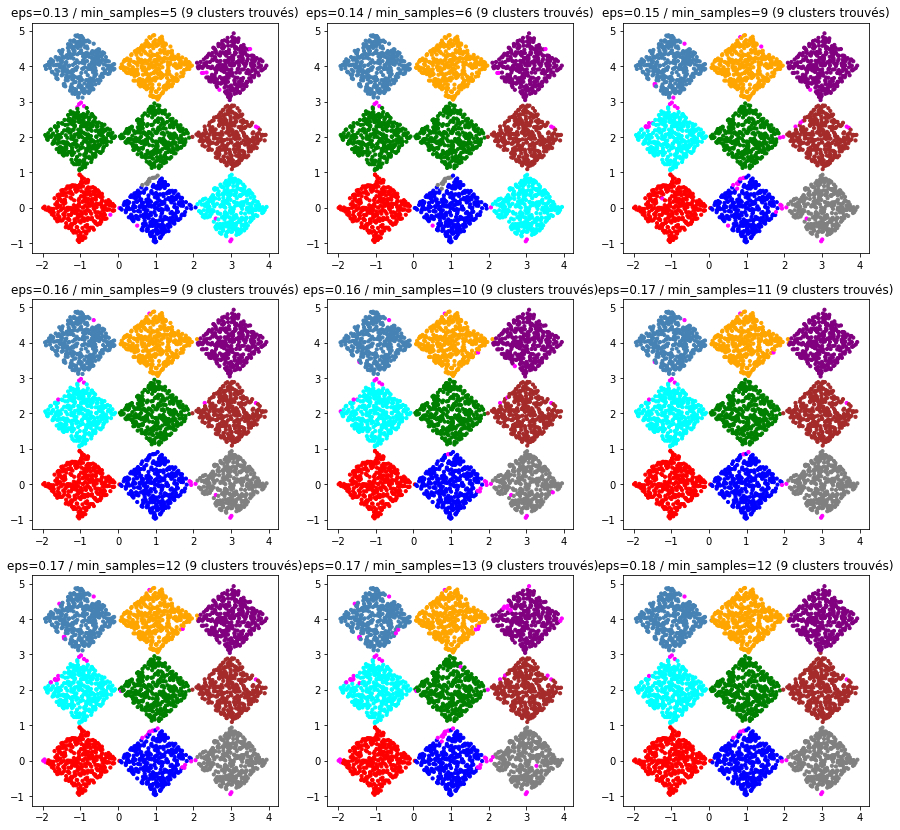

In [21]:


f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

printed = 0
for eps in range(5, 20):
    eps = eps / 100
    
    for min_samples in range(2, 15):
        start_time = time.process_time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        times.append(time.process_time() - start_time)
        
        if max(dbscan.labels_) >= 1:
            values_silhouette.append(
                (eps, min_samples, metrics.silhouette_score(X, dbscan.labels_, metric='euclidean'))
            )
            values_calinski.append(
                (eps, min_samples, metrics.calinski_harabasz_score(X, dbscan.labels_))
            )
            values_bouldin.append(
                (eps, min_samples, metrics.davies_bouldin_score(X, dbscan.labels_))
            )

        
        score = max(dbscan.labels_) + 1
        
        if (score == 9 and printed < 9):
            
            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
            print(dbscan.labels_)
            plt.subplot(10, 3, j)
            #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
            c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
            plt.scatter(data['x'], data['y'], c=c_used, s=10)
            plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
            j += 1
            printed += 1


In [22]:
values_silhouette.sort(key= lambda tup: tup[2], reverse = True)
values_calinski.sort(key= lambda tup: tup[2], reverse = True)
values_bouldin.sort(key= lambda tup: tup[2], reverse = True)

print(values_silhouette[0])
print(values_calinski[0])
print(values_bouldin[0])


(0.16, 9, 0.5439748308221402)
(0.18, 12, 4875.199310203855)
(0.13, 7, 10.794255098544719)


Duration : 0.01687197600000445 s
Score : 2.231728191125225
eps : 0.16 / min_s = 9 / clusters trouvés : 9
[0 0 0 ... 8 8 8]


Text(0.5, 1.0, 'eps=0.16 / min_samples=9 (9 clusters trouvés)')

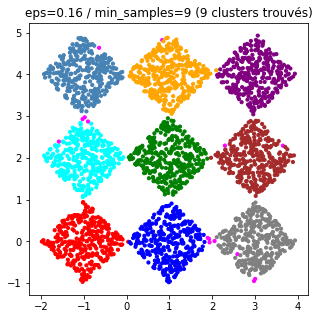

In [23]:
f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(5, 5))

times = []

eps = 0.16
min_samples = 9

s_time = time.process_time()
dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

duration = time.process_time() - s_time

print("Duration : " + str(duration) + " s")

print("Score : " + str(metrics.davies_bouldin_score(X, dbscan.labels_)))


score = max(dbscan.labels_) + 1      
print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
print(dbscan.labels_)
#plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")

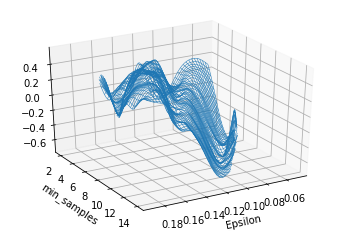

In [24]:

x, y, z = zip(*values_silhouette)

z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(grid_x, grid_y, grid_z, cmap="viridis", linewidth=0.5)

ax.view_init(30, 60)

plt.xlabel("Epsilon")
plt.ylabel("min_samples")

plt.show()




### Recherche hyper paremtre pour spiral

In [ ]:
f = open('data/spiral.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'green', 'cyan', 'gray',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []


printed = 0

for eps in range(5, 100, 5):
    eps = eps / 10
    
    for min_samples in range(2, 150):
        start_time = time.process_time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        times.append(time.process_time() - start_time)
        
        if max(dbscan.labels_) >= 1:
            values_silhouette.append(
                metrics.silhouette_score(X, dbscan.labels_, metric='euclidean')
            )
            values_calinski.append(
                metrics.calinski_harabasz_score(X, dbscan.labels_)
            )
            values_bouldin.append(
                metrics.davies_bouldin_score(X, dbscan.labels_)
            )
        else:
            values_silhouette.append(0)
            values_calinski.append(0)
            values_bouldin.append(0)
        
        score = max(dbscan.labels_) + 1
        
        if (score == 3 and printed <= 5):
            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
            plt.subplot(10, 3, j)
            #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
            c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
            plt.scatter(data['x'], data['y'], c=c_used, s=10)
            plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
            j += 1
            printed += 1


In [ ]:
f = open('data/spiral.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(5,5))

times = []

eps = 1.5
min_samples = 3

s_time = time.process_time()
dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

duration = time.process_time() - s_time

print("Duration : " + str(duration) + " s")
print("Score : " + str(metrics.davies_bouldin_score(X, dbscan.labels_)))


score = max(dbscan.labels_) + 1      
print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
print(dbscan.labels_)
#plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")

### Recherche hyper parametre pour cure

Compliqué pour densité variable (mais normalement ok par rapport au bruit)

In [ ]:
from scipy.io import arff
from sklearn.cluster import DBSCAN

f = open('data/CURE.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []


printed = 0

for eps in range(10, 10000, 1):
    if printed <= 10:
        eps = eps / 1000

        for min_samples in range(2, 15):
            start_time = time.process_time()
            dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            times.append(time.process_time() - start_time)

            if max(dbscan.labels_) >= 1:
                values_silhouette.append(
                    metrics.silhouette_score(X, dbscan.labels_, metric='euclidean')
                )
                values_calinski.append(
                    metrics.calinski_harabasz_score(X, dbscan.labels_)
                )
                values_bouldin.append(
                    metrics.davies_bouldin_score(X, dbscan.labels_)
                )
            else:
                values_silhouette.append(0)
                values_calinski.append(0)
                values_bouldin.append(0)

            score = max(dbscan.labels_) + 1

            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))

            if (score >= 6 and score <= 7):
                print("^^^^^^^^^^^^^")
                plt.subplot(10, 3, j)
                #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
                c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
                plt.scatter(data['x'], data['y'], c=c_used, s=10)
                plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
                j += 1
                printed += 1


In [ ]:
f = open('data/CURE.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(5,5))

times = []

eps = 0.018
min_samples = 8


s_time = time.process_time()
dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

duration = time.process_time() - s_time

print("Duration : " + str(duration) + " s")
print("Score : " + str(metrics.davies_bouldin_score(X, dbscan.labels_)))


score = max(dbscan.labels_) + 1      
print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
#plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("DBSCAN : eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")

### Recherche pour 2d-4c

In [ ]:
f = open('data/2d-4c-no4.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'green', 'cyan', 'gray',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []


printed = 0

for eps in range(5, 100, 5):
    eps = eps / 10
    
    for min_samples in range(2, 150):
        start_time = time.process_time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        times.append(time.process_time() - start_time)
        
        if max(dbscan.labels_) >= 1:
            values_silhouette.append(
                metrics.silhouette_score(X, dbscan.labels_, metric='euclidean')
            )
            values_calinski.append(
                metrics.calinski_harabasz_score(X, dbscan.labels_)
            )
            values_bouldin.append(
                metrics.davies_bouldin_score(X, dbscan.labels_)
            )
        else:
            values_silhouette.append(0)
            values_calinski.append(0)
            values_bouldin.append(0)
        
        score = max(dbscan.labels_) + 1
        
        if (score == 4 and printed < 30):
            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
            plt.subplot(10, 3, j)
            #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
            c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
            plt.scatter(data['x'], data['y'], c=c_used, s=10)
            plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
            j += 1
            printed += 1
            
            
print("Temps moyen pour le calcul d'une solution : " + str(round(np.mean(times), 3)) + " s")


In [ ]:
f = open('data/2d-4c-no4.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(5,5))

times = []

eps = 2
min_samples = 2

s_time = time.process_time()
dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

duration = time.process_time() - s_time

print("Duration : " + str(duration) + " s")
print("Score : " + str(metrics.davies_bouldin_score(X, dbscan.labels_)))


score = max(dbscan.labels_) + 1      
print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
#plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("DBSCAN : eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")

In [ ]:
f = open('data/banana.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'green', 'cyan', 'gray',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []


printed = 0

for eps in range(10, 500, 50):
    eps = eps / 1000
    
    for min_samples in range(2, 20):
        start_time = time.process_time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        times.append(time.process_time() - start_time)
        
        if max(dbscan.labels_) >= 1:
            values_silhouette.append(
                metrics.silhouette_score(X, dbscan.labels_, metric='euclidean')
            )
            values_calinski.append(
                metrics.calinski_harabasz_score(X, dbscan.labels_)
            )
            values_bouldin.append(
                metrics.davies_bouldin_score(X, dbscan.labels_)
            )
        else:
            values_silhouette.append(0)
            values_calinski.append(0)
            values_bouldin.append(0)
        
        score = max(dbscan.labels_) + 1
        
        if (score == 2 and printed < 30):
            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
            plt.subplot(10, 3, j)
            #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
            c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
            plt.scatter(data['x'], data['y'], c=c_used, s=10)
            plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
            j += 1
            printed += 1
            
            
print("Temps moyen pour le calcul d'une solution : " + str(round(np.mean(times), 3)) + " s")


In [ ]:
f = open('data/banana.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(5,5))

times = []

eps = 0.06
min_samples = 10

s_time = time.process_time()
dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

duration = time.process_time() - s_time

print("Duration : " + str(duration) + " s")


score = max(dbscan.labels_) + 1      
print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
#plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("DBSCAN : eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")

# HDBSCAN

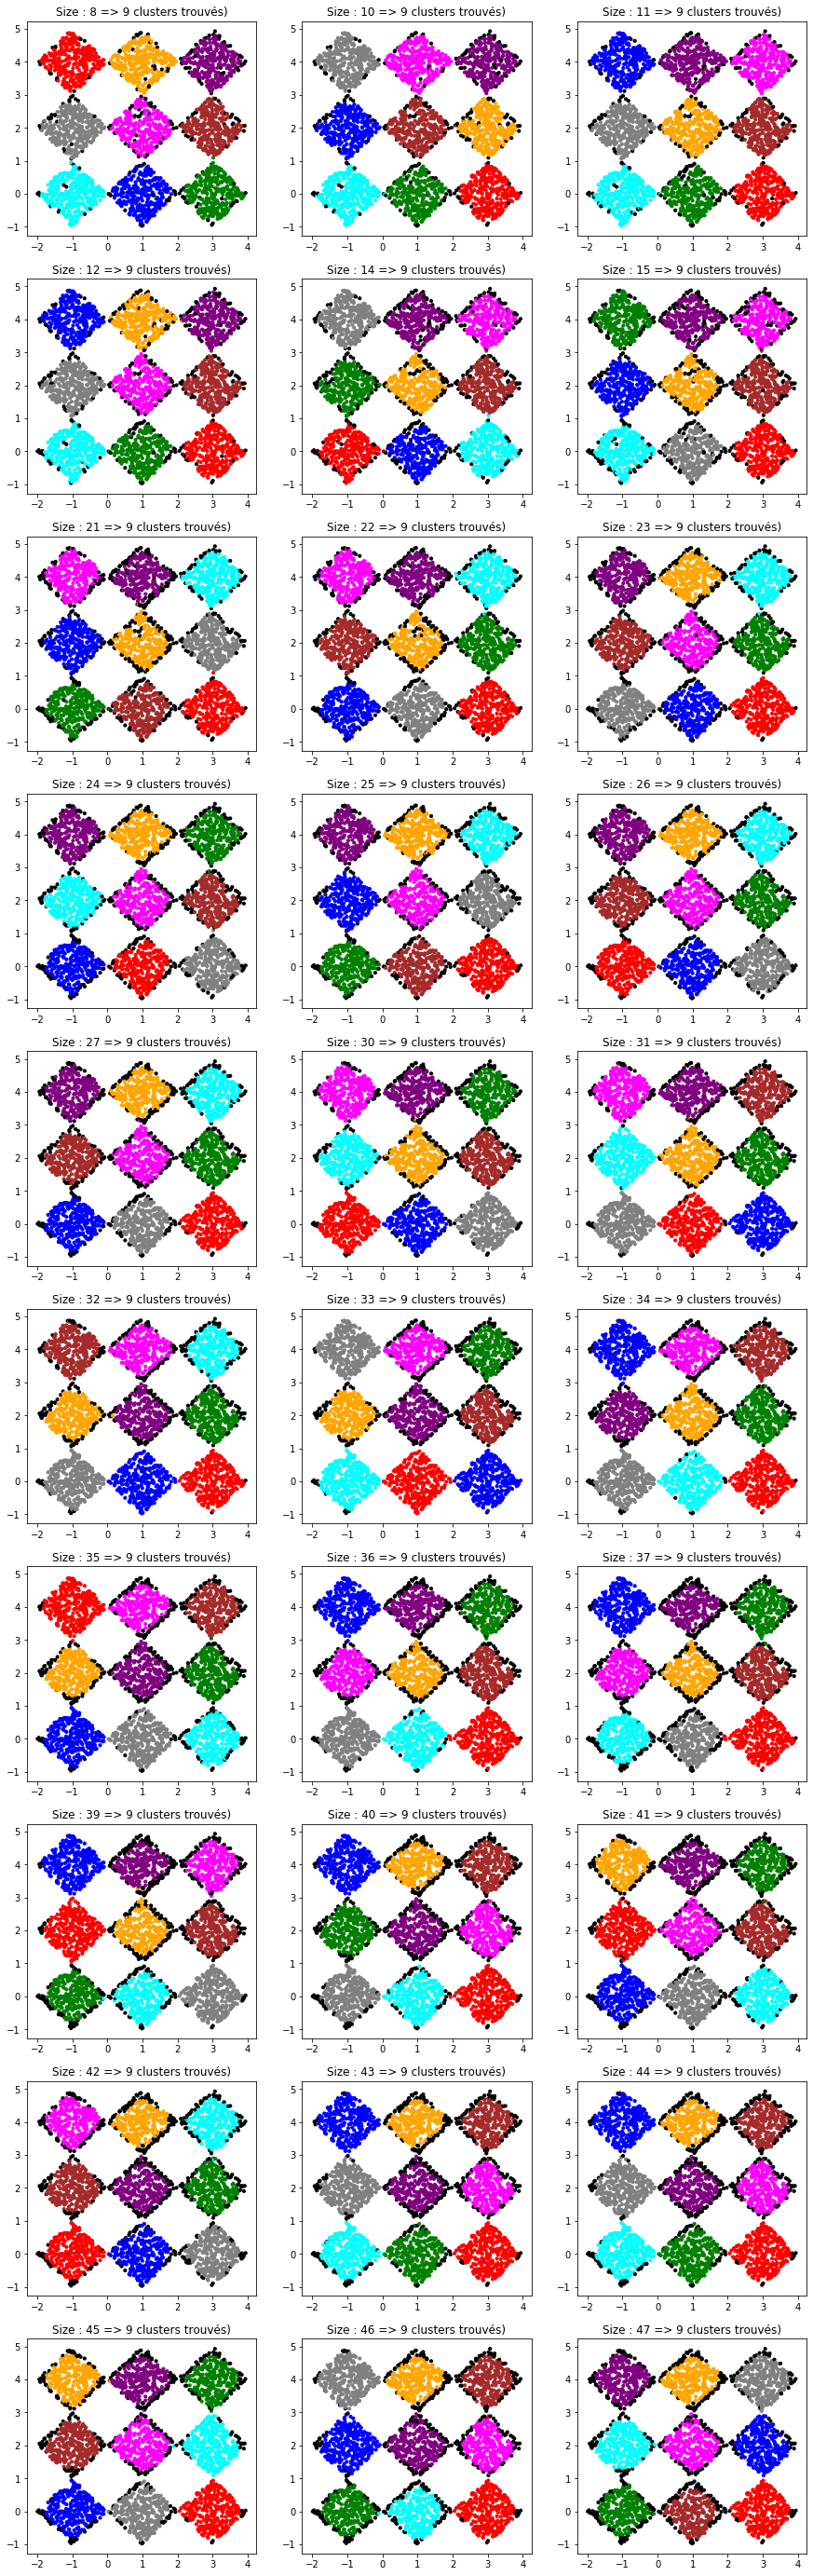

In [15]:
f = open('data/diamond9.arff', 'r')

data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', '#000000']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []
j = 1

max_size = 100

printed = 0
for size in range(2, max_size):
    start_time = time.process_time()
    hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size).fit_predict(X)
    times.append(time.process_time() - start_time)
    values_silhouette.append(
        metrics.silhouette_score(X, hdbscan_labels, metric='euclidean')
    )
    values_calinski.append(
        metrics.calinski_harabasz_score(X, hdbscan_labels)
    )
    values_bouldin.append(
        metrics.davies_bouldin_score(X, hdbscan_labels)
    )
    
    if(max(hdbscan_labels + 1) == 9 and printed < 30):
        plt.subplot(10, 3, j)

        #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
        c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
        plt.scatter(data['x'], data['y'], c=c_used, s=10)
        plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")
        j += 1
        printed += 1


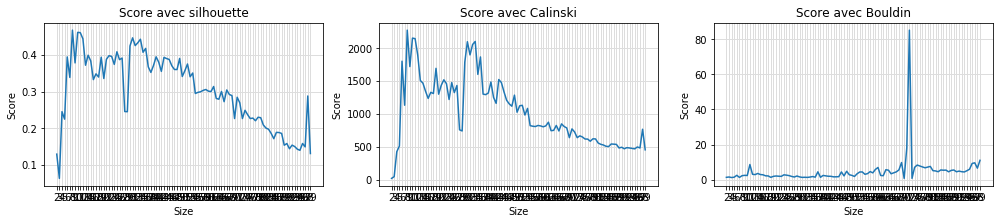

In [7]:
plt.figure(figsize=(17, 3))

plt.subplot(1, 3, 1)

plt.title('Score avec silhouette')
plt.xlabel('Size')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,max_size))
plt.plot(range(2,max_size), values_silhouette)

plt.subplot(1, 3, 2)

plt.title('Score avec Calinski')
plt.xlabel('Size')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,max_size))
plt.plot(range(2,max_size), values_calinski)

plt.subplot(1, 3, 3)

plt.title('Score avec Bouldin')
plt.xlabel('Size')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,max_size))
plt.plot(range(2,max_size), values_bouldin)


Duration : 0.08181738000000394 s


Text(0.5, 1.0, 'Size : 10 => 9 clusters trouvés)')

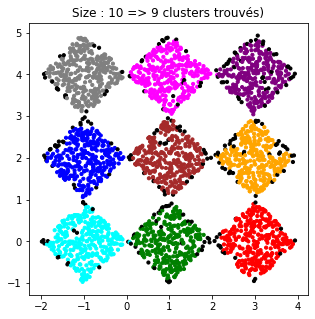

In [8]:
plt.figure(figsize=(5,5))

size = 10

s_time = time.process_time()
hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size).fit_predict(X)

duration = time.process_time() - s_time

print("Duration : " + str(duration) + " s")


c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")

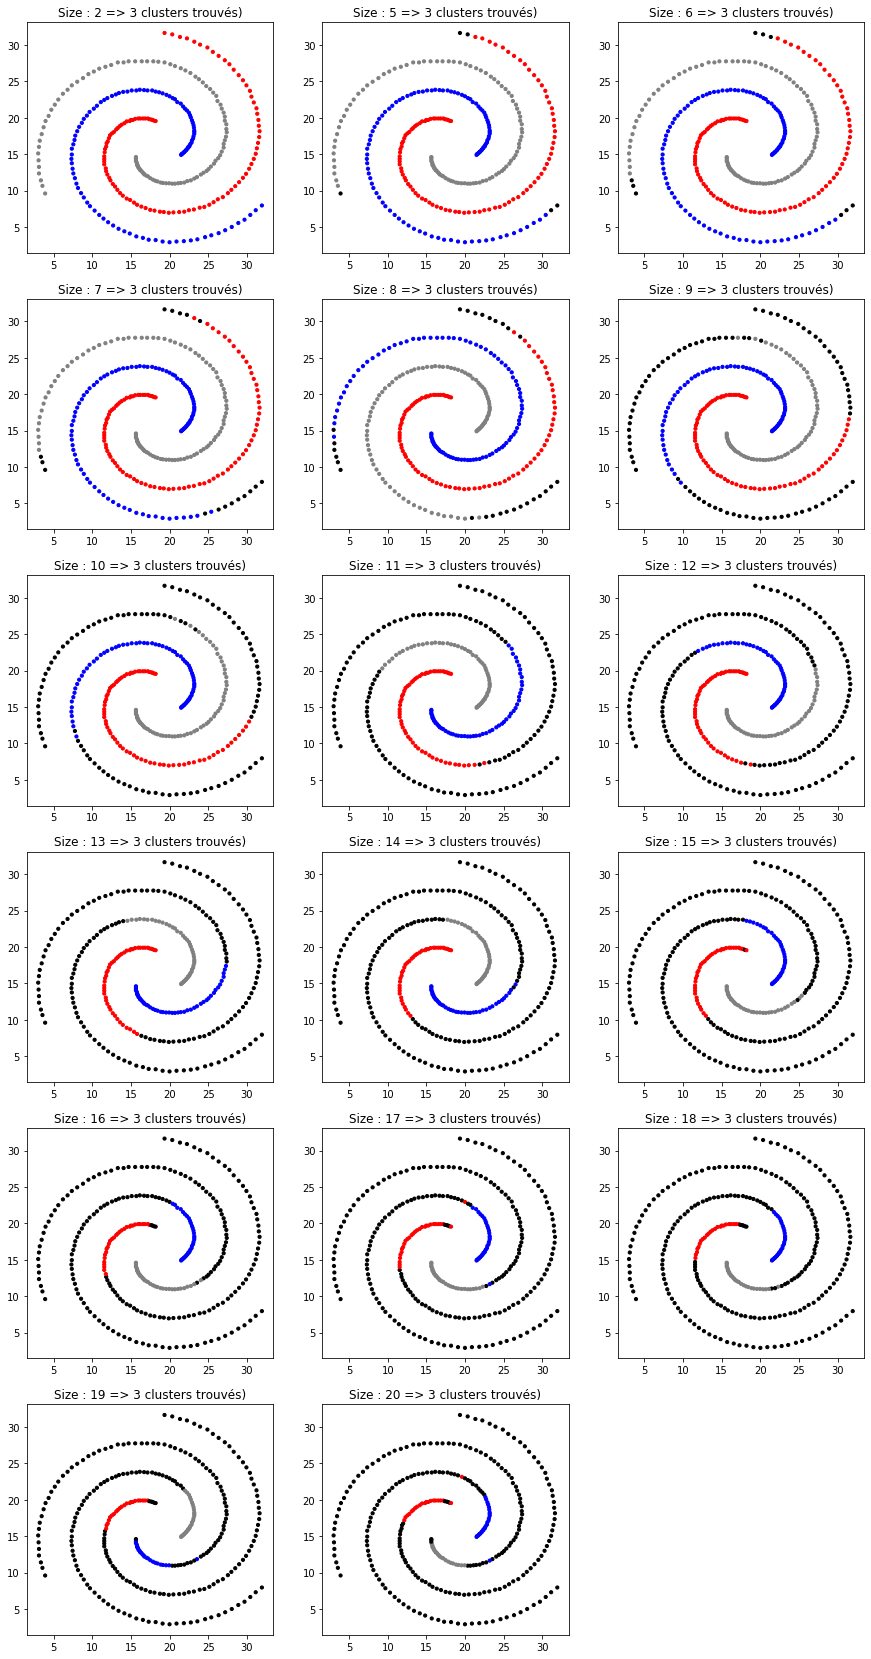

In [9]:

f = open('data/spiral.arff', 'r')

data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', '#000000']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []
j = 1

max_size = 100

printed = 0
for size in range(2, max_size):
    start_time = time.process_time()
    hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size).fit_predict(X)
    times.append(time.process_time() - start_time)
    """
    if (max(hdbscan_labels)> 1):
        values_silhouette.append(
            metrics.silhouette_score(X, hdbscan_labels, metric='euclidean')
        )
        values_calinski.append(
            metrics.calinski_harabasz_score(X, hdbscan_labels)
        )
        values_bouldin.append(
            metrics.davies_bouldin_score(X, hdbscan_labels)
        )
    else:
        values_silhouette.append(0)
        values_calinski.append(0)
        values_bouldin.append(0)
    """
    if(max(hdbscan_labels + 1) == 3 and printed < 30):
        plt.subplot(10, 3, j)

        #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
        c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
        plt.scatter(data['x'], data['y'], c=c_used, s=10)
        plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")
        j += 1


Duration : 0.009445557000006488 s


Text(0.5, 1.0, 'HDBSCAN : Size : 2 => 3 clusters trouvés')

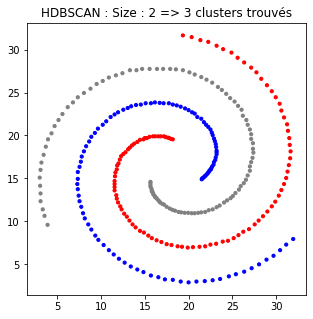

In [11]:
plt.figure(figsize=(5,5))

size = 2

s_time = time.process_time()
hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size).fit_predict(X)

duration = time.process_time() - s_time

print("Duration : " + str(duration) + " s")


c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("HDBSCAN : Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés")

In [12]:
def progressBar(value, endvalue, bar_length=20):

    percent = float(value) / endvalue
    arrow = '-' * int(round(percent * bar_length)-1) + '>'
    spaces = ' ' * (bar_length - len(arrow))

    sys.stdout.write("\rPercent: [{0}] {1}%".format(arrow + spaces, int(round(percent * 100))))
    sys.stdout.flush()

In [13]:

f = open('data/CURE.arff', 'r')

data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []
j = 1

max_size = 30
min_samples = 30
printed = 0


progress = 1

for size in range(2, max_size):
    for min_sample in range(2, min_samples):
        progressBar(progress, (min_samples-2)*(max_size-2))
        progress += 1
        start_time = time.process_time()
        hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size, min_samples=min_sample).fit_predict(X)
        times.append(time.process_time() - start_time)
        if ((max(hdbscan_labels)+1) >= 5) and ((max(hdbscan_labels)+1) <= 7):
            values_silhouette.append(
                (size, min_samples, metrics.silhouette_score(X, hdbscan_labels, metric='euclidean'))
            )
            values_calinski.append(
                (size, min_samples, metrics.calinski_harabasz_score(X, hdbscan_labels))
            )
            values_bouldin.append(
                (size, min_samples, metrics.davies_bouldin_score(X, hdbscan_labels))
            )
            
            if printed < 30:
                plt.subplot(10, 3, j)

                c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
                plt.scatter(data['x'], data['y'], c=c_used, s=10)
                plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")
                j += 1
                printed += 1
        



NameError: name 'sys' is not defined

<Figure size 1080x3600 with 0 Axes>

In [ ]:
f = open('data/CURE.arff', 'r')

data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

plt.figure(figsize=(5,5))

size = 29


s_time = time.process_time()
hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size, min_samples=40).fit_predict(X)

duration = time.process_time() - s_time

print("Duration : " + str(duration) + " s")


c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("HDBSCAN : Size : " + str(size) + " / min_samples : 40 => " + str(max(hdbscan_labels + 1)) + " clusters trouvés")

In [ ]:
values_silhouette.sort(key= lambda tup: tup[2], reverse = True)
values_calinski.sort(key= lambda tup: tup[2], reverse = True)
values_bouldin.sort(key= lambda tup: tup[2], reverse = True)

print(values_silhouette[0])
print(values_calinski[0])
print(values_bouldin[0])


In [ ]:
plt.figure(figsize=(5,5))

size = 8

hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=36, min_samples=7).fit_predict(X)

c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")

In [ ]:

f = open('data/2d-4c-no4.arff', 'r')

data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []
j = 1

max_size = 100

printed = 0
for size in range(2, max_size):
    start_time = time.process_time()
    hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size).fit_predict(X)
    times.append(time.process_time() - start_time)

    if(max(hdbscan_labels + 1) == 4 and printed < 30):
        plt.subplot(10, 3, j)

        #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
        c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
        plt.scatter(data['x'], data['y'], c=c_used, s=10)
        plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")
        j += 1

        
print("Temps moyen pour le calcul d'une solution : " + str(round(np.mean(times), 3)) + " s")


In [ ]:
plt.figure(figsize=(5,5))

size = 6

s_time = time.process_time()
hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size).fit_predict(X)

duration = time.process_time() - s_time

print("Duration : " + str(duration) + " s")


c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("HDBSCAN : Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés")

In [ ]:

f = open('data/banana.arff', 'r')

data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []
j = 1

max_size = 100

printed = 0
for size in range(2, max_size):
    start_time = time.process_time()
    hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size).fit_predict(X)
    times.append(time.process_time() - start_time)

    if(max(hdbscan_labels + 1) == 2 and printed < 30):
        plt.subplot(10, 3, j)

        #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
        c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
        plt.scatter(data['x'], data['y'], c=c_used, s=10)
        plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")
        j += 1
        printed += 1
        
print("Temps moyen pour le calcul d'une solution : " + str(round(np.mean(times), 3)) + " s")


In [ ]:
size = 3
hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size).fit_predict(X)

#plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")
plt.show()